## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')
df

,X,Y
0,1,3
1,2,4
2,3,8
3,4,4
4,5,6
5,6,9
6,7,8
7,8,12
8,9,15
9,10,26


## Dataset Visualization

In [3]:
import matplotlib.pyplot as plt

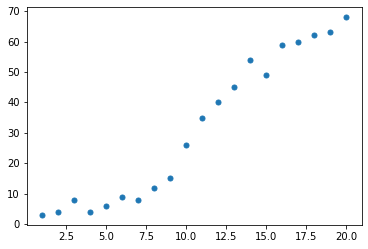

In [4]:
plt.scatter(df['X'], df['Y'], s=25)
plt.show()

## Splitting Dataset: Features & Target Variable

In [5]:
X = df.iloc[:, 0:1] # == np.array(df['X']).reshape(-1, 1)
X

,X
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
import numpy as np
y = np.array(df['Y']).reshape(-1, 1)
y

array([[ 3],
       [ 4],
       [ 8],
       [ 4],
       [ 6],
       [ 9],
       [ 8],
       [12],
       [15],
       [26],
       [35],
       [40],
       [45],
       [54],
       [49],
       [59],
       [60],
       [62],
       [63],
       [68]], dtype=int64)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X); print(y)

[[-1.64750894]
 [-1.47408695]
 [-1.30066495]
 [-1.12724296]
 [-0.95382097]
 [-0.78039897]
 [-0.60697698]
 [-0.43355498]
 [-0.26013299]
 [-0.086711  ]
 [ 0.086711  ]
 [ 0.26013299]
 [ 0.43355498]
 [ 0.60697698]
 [ 0.78039897]
 [ 0.95382097]
 [ 1.12724296]
 [ 1.30066495]
 [ 1.47408695]
 [ 1.64750894]]
[[-1.20590704]
 [-1.16359452]
 [-0.9943444 ]
 [-1.16359452]
 [-1.07896946]
 [-0.95203188]
 [-0.9943444 ]
 [-0.82509429]
 [-0.69815671]
 [-0.2327189 ]
 [ 0.14809385]
 [ 0.35965649]
 [ 0.57121913]
 [ 0.95203188]
 [ 0.74046924]
 [ 1.16359452]
 [ 1.20590704]
 [ 1.2905321 ]
 [ 1.33284463]
 [ 1.54440727]]


## Splitting Dataset: Training Set & Test Set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=1
)

## Training Model

In [12]:
from sklearn.svm import SVR

In [13]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

c:\users\aryya\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Model Visualization

In [14]:
y_vis = model.predict(X)

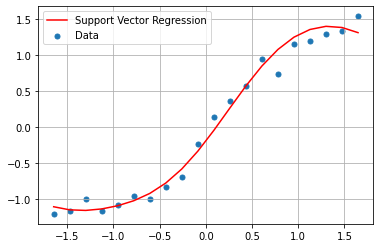

In [20]:
plt.scatter(X, y, s=25, label='Data')
plt.plot(X, y_vis, '-r', label='Support Vector Regression')

plt.legend()
plt.grid()
plt.show()

## Model Evaluation

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(rmse)
print(r2)

0.1669636808322487
0.9724535583564619
